# Overview
**What Is a Backorder?**

A backorder is an order for a good or service that cannot be filled at the current time due to a lack of available supply. The item may not be held in the company's available inventory but could still be in production, or the company may need to still manufacture more of the product.

**Problems with Backorders**

* If a company consistently sees items in backorder, this could be taken as a signal that the company's operations are far too lean. It may also mean the company is losing out on business by not providing the products demanded by its customers. If a customer sees products on backorder—and notices this frequently—they may decide to cancel orders, forcing the company to issue refunds and readjust their books.

* When an item is on backorder, a customer may look elsewhere for a substitute product, especially if the expected wait time until the product becomes available is long. This can provide an opportunity for once loyal customers to try other companies' products and potentially switch their loyalties. Difficulties with proper inventory management can lead to the eventual loss of market share as customers become frustrated with the company's lack of product availability.

# Probel Definition
Okay so after knowing what `Backorder` is and disadvantages associated with it, we are going to build a machine learning model to predict if ` a product will be in backorder or not`.

# Evaluation
If we are able to get a good accuracy score between **70** and **80** and a good precision and recal score between  **60** and 85, then our model will be ready to be served in production.

# Algorithms to experiment on
* Artificial Neural Network
* RandomForestClassifier
* DecisionTree
* NaiveBayes
* LogisticRegression
* K-Nearest Neighbour(KNN)
* Support Vector Machine(SVM)
* GradientBoostingClassifier

# Evaluation Metrics
* Accuracy score
* F1 score
* Precision
* Recall
* Confusion matrics
* Classification report

# Deployment
* **Cloud** Amazon Web Services(AWS).
* **Backend** Python to create a rest API for our model.
* **Frontend** Bootstrap, html, css and javascript.
* **Proccess** Will use `cli` to automate the entire deployment process.
* **GCP Services** 
  * Google CloudRun.
  * Google Container Registory.
* **Others** Docker.

# Steps used to build model
* Get our tools ready.
* Perform Exploratory Data Analysis.
* Preprocess training and test dataset saperatelly.
* Build our base model.
* Make predictions.
* Evaluate our model.
* Choose the model with good results by comparing with our evaluation.
* Perform Hyperparameter tunning.
* Make conclusion.

  # Dataset
  The dataset used can be downloaded by clicking the link provided bellow   [Dataset...](https://machinelearningmodelsbucket.s3.amazonaws.com/backlog.zip)

#Get our tools ready
We are going to import all the libries we will use to build our model.

In [ ]:
#Disable warning
import warnings
warnings.filterwarnings('ignore')

#Import core tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import scikit learn libries
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

#Metrics to evaluate our models on
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, \
confusion_matrix, classification_report

#Algorithms to experiment on
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Hyperparameter libries
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#Import tensorflow libries
import tensorflow as tf

#Import other libries
import zipfile
import pickle

# Exploratory Data Analysis
Okay so we have successfully make preparations. Now, we are going to perform exploratory data analysis on our dataset by beforming some activities such as checking null values, checking categorical and numeric features, finding the correlation between dependent and non dependent features etc... Okay so, lets get started.

In [ ]:
#Import dataset from aws s3
!wget https://machinelearningmodelsbucket.s3.amazonaws.com/backlog.zip
dataset = zipfile.ZipFile("backlog.zip")
dataset.extractall()
dataset.close()

--2021-08-19 17:45:32--  https://machinelearningmodelsbucket.s3.amazonaws.com/backlog.zip
Resolving machinelearningmodelsbucket.s3.amazonaws.com (machinelearningmodelsbucket.s3.amazonaws.com)... 52.216.245.220
Connecting to machinelearningmodelsbucket.s3.amazonaws.com (machinelearningmodelsbucket.s3.amazonaws.com)|52.216.245.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27314219 (26M) [application/zip]
Saving to: ‘backlog.zip.1’

backlog.zip.1       100%[===================>]  26.05M  89.4MB/s    in 0.3s    

2021-08-19 17:45:33 (89.4 MB/s) - ‘backlog.zip.1’ saved [27314219/27314219]



In [ ]:
#Read in dataset
dataset = pd.read_csv("/content/dataset/Kaggle_Training_Dataset_v2.csv", na_values=["!",'"',"#","%","&","'","(",")",
"*","+",",","-",".","/",":",";","<","=",">","?","@","[","\\","]","^","_","`","{","|","}","~","–"])

#Display dataset
dataset.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


### **Null values**

In [ ]:
#Check for null values in our dataset
dataset.isna().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

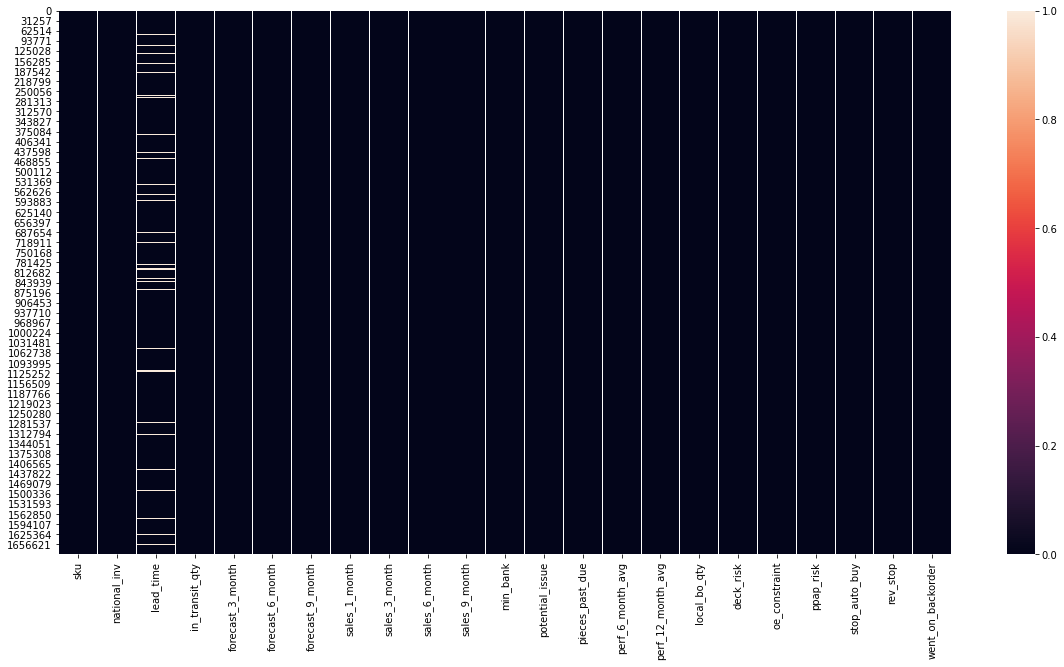

In [ ]:
#Okay so lets visualize our null values using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isnull())
plt.show()

From above, we can see that all features have one(1) Nan values except `lead_time` feature which contains more Nan values. We will replace these features with values based on their `Normal Distribution` during our preprocessing stage and drop the feature `lead time`. Lets continue by exploring categorical and numeric features.

### **Categorical and Numeric features**

In [ ]:
#Check for dataset types
dataset.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [ ]:
#Check the total number of categorical features
print("Total number of categorical features is: {val} \
".format(val=len(dataset.select_dtypes(include=["category", "object"]).columns)
))

Total number of categorical features is: 8 


In [ ]:
#Check the total number of numeric features
print("Total number of categorical features is: {val} \
".format(val=len(dataset.select_dtypes(exclude=["category", "object"]).columns)
))

Total number of categorical features is: 15 


Okay so from above, we have eight(8) categorical features and fiftheen(15) numeric features. We will OneHotEncode all our categorical features during preprocessing stage. Lets continue by exploring our `Target Feature`.

### **Explore Target Feature(went_on_backorder)**

In [ ]:
#Check total value in each class
dataset["went_on_backorder"].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

In [ ]:
#Check total value in each class in percentage form
dataset["went_on_backorder"].value_counts() / len(dataset)

No     0.993309
Yes    0.006691
Name: went_on_backorder, dtype: float64

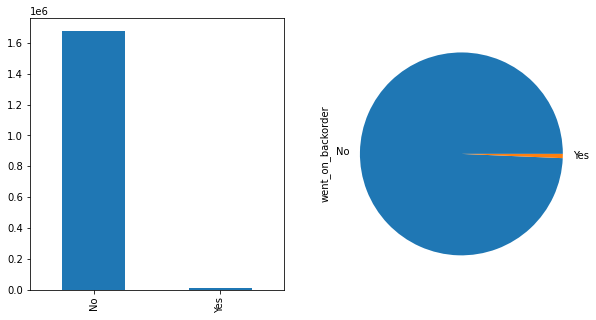

In [ ]:
#Lets visualize our result
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
dataset["went_on_backorder"].value_counts().plot(kind="bar")
plt.subplot(1, 2, 2)
dataset["went_on_backorder"].value_counts().plot(kind="pie")
plt.show()

From above, we can see that most of our dataset belong to products that are not in backorder. This means our dataset is not balanced at all hence, we will balance this dataset before we start our preprocessing stage. Lets continue by checking the correlation between the dependent feature and the non dependent features.

### **Correlation between dependets and target feature**
We are going to use heatmap to help us visualize the correlation in our dataset. Non dependent features having high correlation with other features will be droped.

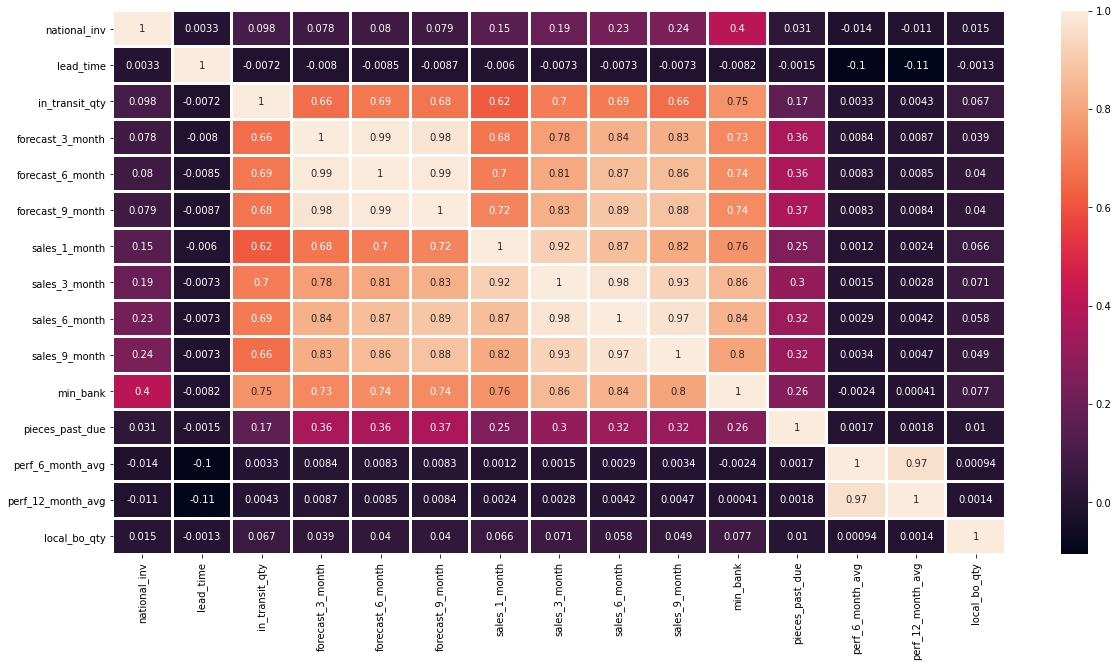

In [ ]:
#Visualize correlation
plt.figure(figsize=(20, 10))
sns.heatmap(dataset.corr(), annot=True, linewidths=2)
plt.show()

In [ ]:
"""
Okay so we are going to create a custom function
to help us dislay or list all highly correlated
features with a thresshol of 0.90.
"""
def high_correlated(datasets, threshold):
  """
  A function to display highly
  correlated features in our
  dataset.
  Args:
    dataset:
        This is the dataset to
        find the correlation between target
        and non dependent features
    threshold:
        The number to use to determine
        if a feature highly correlates
        with another feature.
  """
  cor_col = set()
  cor_mat = datasets.corr()
  for i in range(len(cor_mat.columns)):
      for j in range(i):
          if abs(cor_mat.iloc[i, j]) > threshold:
              colname = cor_mat.columns[i]
              cor_col.add(colname)
  return cor_col

In [ ]:
#Get highly correlated features
correlated_features = high_correlated(dataset, 0.90)

#Display highly correlated features
correlated_features

{'forecast_6_month',
 'forecast_9_month',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'}

From above, we can see that some features are higly correlated to other features in our dataset. Hence, we will drop all this features from above when performng feature selection our dataset. Lets continue to explore outliers in our datasets.

# Preprocessing Train Data
Finally, we are going to perform preprocessing on both

* `Training` dataset.
* `Testing` dataset.

We are going to user scikitlearn `Pipelines` and `ColumnTransformers` to perform our preprocessing. So, we will first replace all null values depending on the distribution of our dataset, Convert categorical dataset into numeric then scale our dataset also depending on the distribution of our datasets. Okay so before we start, lets first:
* `Drop` both sku, time_lead and highly correlated features.
*  `Balance` our dataset.

Okay so lets just get started.

### **Balance train Dataset**
we have successfully explored our datasets. Now are going to balance our dataset so that they will all have the same number of dataset in each class. Lets get started.

In [ ]:
#Display dataset
dataset.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
#Split dataset into went_on_backorder = yes and went_on_backorder = no. Lets get started.
yes = dataset[dataset["went_on_backorder"] == "Yes"]
no = dataset[dataset["went_on_backorder"] == "No"]

In [ ]:
#Chech shapes
dataset.shape, yes.shape, no.shape

((1687861, 23), (11293, 23), (1676567, 23))

In [ ]:
"""Okay so we have successfully split our dataset
into yes and no. Now, we are going to balance
our dataset using the total number of classes in
yes dataset using pandas sample. Lets get started."""
#Set random seed
tf.random.set_seed(42)

#Get generated dataset
no_ = no.sample(yes.shape[0])

In [ ]:
#Display dataset shapes after
no_.shape, yes.shape

((11293, 23), (11293, 23))

In [ ]:
#Okay so now lets concatnate both into one dataset
balanced_dt = pd.concat([no_, yes], axis=0)

#Display results
balanced_dt.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1642057,3240004,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.92,0.87,0.0,No,No,No,Yes,No,No
1101331,1464265,10.0,12.0,8.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.58,0.58,0.0,Yes,No,No,Yes,No,No
386890,1734851,26.0,8.0,0.0,0.0,0.0,0.0,2.0,6.0,13.0,21.0,0.0,No,0.0,0.90,0.95,0.0,No,No,No,Yes,No,No
1240515,2822084,2.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,No,0.0,0.83,0.85,0.0,No,No,Yes,Yes,No,No
633338,1981313,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.24,0.14,0.0,Yes,No,No,Yes,No,No


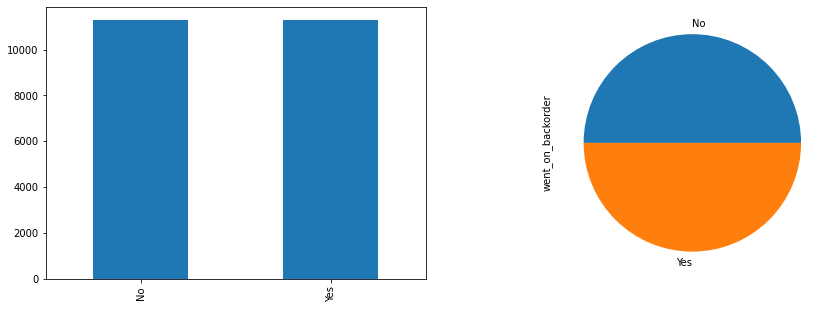

In [ ]:
"""Okay we have successfully balanced our
dataset now. Lets try to visualize our dataset
and see our results."""
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
balanced_dt["went_on_backorder"].value_counts().plot(kind="bar")
plt.subplot(1, 2, 2)
balanced_dt["went_on_backorder"].value_counts().plot(kind="pie")
plt.show()

Okay so we have successfully balanced our dataset. Okay so we are going to start with our preprocessing steps. We will now split our dataset into training and test because both were given to us saperatelly. But before we get started with our preprocessing steps, we will saperate our dataset into **x_train** and **y_train** then drop our highly correlated features and **lead_time** feature. Now lets get started.

In [ ]:
#Split dataset into x_train and y_train
x_train = balanced_dt.drop("went_on_backorder", axis=1)
y_train = balanced_dt["went_on_backorder"]

In [ ]:
#Display x_train dataset
x_train.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1642057,3240004,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.92,0.87,0.0,No,No,No,Yes,No
1101331,1464265,10.0,12.0,8.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.58,0.58,0.0,Yes,No,No,Yes,No
386890,1734851,26.0,8.0,0.0,0.0,0.0,0.0,2.0,6.0,13.0,21.0,0.0,No,0.0,0.90,0.95,0.0,No,No,No,Yes,No
1240515,2822084,2.0,2.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,No,0.0,0.83,0.85,0.0,No,No,Yes,Yes,No
633338,1981313,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.24,0.14,0.0,Yes,No,No,Yes,No


In [ ]:
#Display y_train dataset
y_train.head()

1642057    No
1101331    No
386890     No
1240515    No
633338     No
Name: went_on_backorder, dtype: object

In [ ]:
#Display both shapes
x_train.shape, y_train.shape

((22586, 22), (22586,))

## Drop features

In [ ]:
#Display highly correlated features
correlated_features

{'forecast_6_month',
 'forecast_9_month',
 'perf_12_month_avg',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month'}

In [ ]:
#Drop highly correlated features with liad time
x_train_ = x_train.drop([
 'forecast_6_month','forecast_9_month','perf_12_month_avg',"sku",
 'sales_3_month','sales_6_month','sales_9_month',"lead_time"           
], axis=1)

In [ ]:
#Display dataset shape
x_train_.shape

(22586, 14)

## Preprocessing train dataset
Okay so we are now ready to preprocess our dataset. Now, we are going to use `ColumnTransformer` and `Pipelines` to preprocess our datasets. Here, we are going to perform the following:

* Replace Null values based on the distribution of the dataset.
* Convert categorical features into numeric.
* Scale our dataset based on the distribution of our datasets.

Without wasting much time, lets get started.


In [ ]:
#Get categorical features
cat_cols = x_train_.select_dtypes(include=["object","category"]).columns
num_cols = x_train_.select_dtypes(exclude=["object", "category"]).columns

In [ ]:
#Display categorical features
cat_cols

Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')

In [ ]:
#Display numeric features
num_cols

Index(['national_inv', 'in_transit_qty', 'forecast_3_month', 'sales_1_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty'],
      dtype='object')

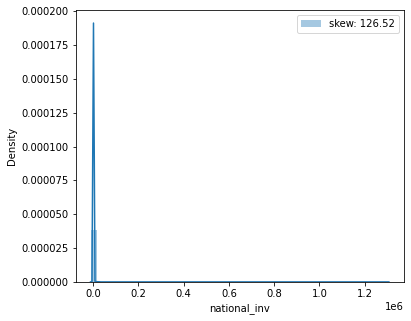

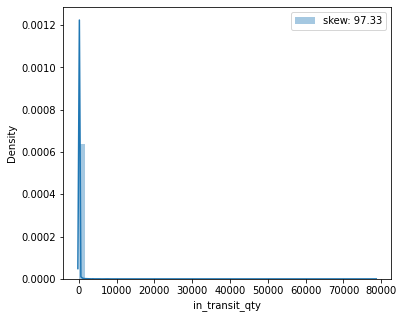

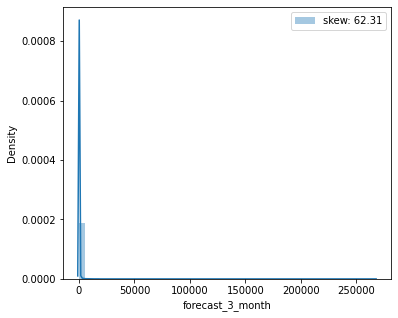

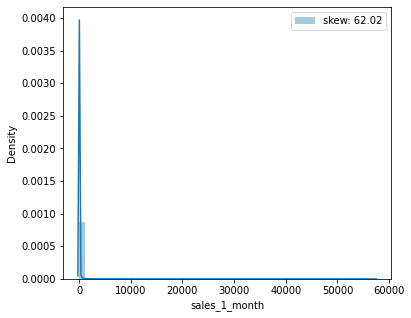

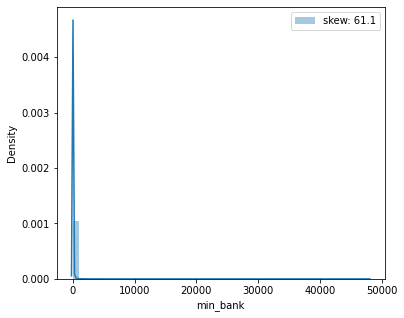

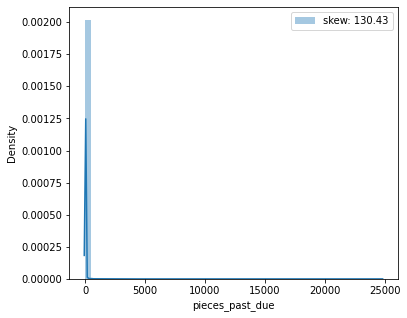

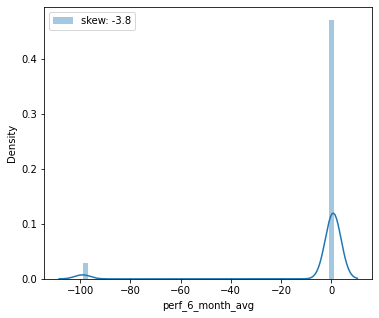

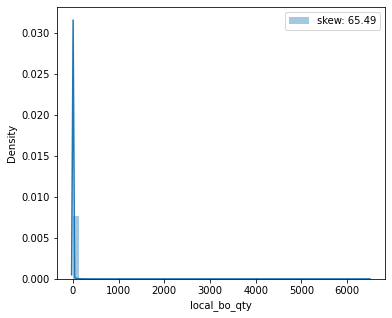

In [ ]:
#Check distribution of our dataset
for col in x_train_[list(x_train_.select_dtypes(exclude=["object"]))]:
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    sns.distplot(x_train_[col], label="skew: "+str(np.round(x_train_[col].skew(),2)))
    plt.legend()

In [ ]:
#Check original dataset null values
print(f"The total number of Nan values in original dataset is: {dataset.isna().sum().sum()}")
print(f"The total number of Nan values in dataset after balance is: {x_train_.isna().sum().sum()}")

The total number of Nan values in original dataset is: 100915
The total number of Nan values in dataset after balance is: 0


**Conclusion**
After checking the total number of Nan values in original and balanced dataset, we can see that there is no Nan values in our balanced dataset. Why? this is because we used pandas `**sample**` which randomly selected the values in our dataset for us. By doing so, it did not selected the rows with the null values. Hence, we dont have to deal with any null values in our dataset. In other to reproduce the same dataset when we re-run the notebook, we have use `**tf.random.set_seed(42)**` to continueslly generate the same values. Okay so now that we dont have to any null values in our datasets, lets continue by **OneHotEncoiding** our categorical dataset then scale our numeric values. Okay so lets get started now.

In [ ]:
"""
NOTE:
  Now we know the distribution of our dataset. Its
"""

#Categorical pipeline
cat_pip = Pipeline([
  ("step1", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

#Numeric pipeline
num_pip = Pipeline([
  ("step1", MinMaxScaler())
])

#Column transofmer to call our pipelines
cat_ = ColumnTransformer([
   ("step1", cat_pip, cat_cols),
   ("step2", num_pip, num_cols)
], remainder="passthrough")

In [ ]:
#Fit on train datasets
cat_.fit(x_train_)

ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('step1',
                                 Pipeline(memory=None,
                                          steps=[('step1',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='ignore',
                                                                sparse=False))],
                                          verbose=False),
                                 Index(['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
       'stop_auto_buy', 'rev_stop'],
      dtype='object')),
                                ('step2',
                                 Pip

In [ ]:
#Transform on train dataset
xxtrain = cat_.transform(x_train_)

#Display
xxtrain

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.99200000e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.95800000e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.99000000e-01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.94400000e-01, 1.94594595e-02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.99800000e-01, 6.17760618e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.98600000e-01, 1.54440154e-04]])

In [ ]:
#Display onehotencoded columns(categorical features)
cat_.transformers_[0][1].named_steps["step1"].get_feature_names()

array(['x0_No', 'x0_Yes', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No',
       'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes'], dtype=object)

In [ ]:
#Display categorical features
num_cols

Index(['national_inv', 'in_transit_qty', 'forecast_3_month', 'sales_1_month',
       'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty'],
      dtype='object')

In [ ]:
#Create a dataframe out of our results
xxtrain_ = pd.DataFrame(xxtrain, columns=['x0_No', 'x0_Yes', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No',
                                'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes','national_inv', 'in_transit_qty', 
                               'forecast_3_month', 'sales_1_month','min_bank', 'pieces_past_due', 'perf_6_month_avg', 
                               'local_bo_qty'])

#Display results
xxtrain_.head()

,x0_No,x0_Yes,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,x5_No,x5_Yes,national_inv,in_transit_qty,forecast_3_month,sales_1_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006280,0.000000,0.000000,0.000000,0.000021,0.0,0.9992,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006283,0.000102,0.000007,0.000000,0.000021,0.0,0.9958,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006296,0.000000,0.000000,0.000035,0.000000,0.0,0.9990,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.006277,0.000000,0.000000,0.000000,0.000000,0.0,0.9983,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006281,0.000000,0.000000,0.000000,0.000021,0.0,0.9924,0.0


Okay so now we have successfully preproccessed our train dataset. Now we are going to perform feature selection. We are going to select the most eight(8) import features to train or build our model from.But before we do that, we are going to **label encode** our y_train dataset. Okay so now lets get started.

In [ ]:
#Initialize label encoding
label = LabelEncoder()

#Fit on y_train dataset
ytrain = label.fit_transform(y_train)

In [ ]:
#Display results
ytrain

array([0, 0, 0, ..., 1, 1, 1])

## Feature Selection

In [ ]:
#Initialize select KBest
KBest = SelectKBest(score_func=chi2, k=8)

#Fit on train datasets
KBest.fit(xxtrain_, ytrain)

SelectKBest(k=8, score_func=<function chi2 at 0x7f848fccd830>)

In [ ]:
#Get score
scores = KBest.scores_

#Display scores
scores

array([8.59375000e-02, 3.33793103e+01, 2.30459465e+01, 9.31924967e+01,
       1.10741971e-03, 2.27272727e+00, 6.09602308e+00, 3.72829238e+01,
       6.85433526e+00, 2.72961650e-01, 3.98529868e-04, 3.00000000e+00,
       1.18327689e-01, 4.20671752e+00, 8.22748160e-02, 9.11862768e-01,
       1.95581903e+00, 2.75452859e-02, 8.59071136e+00, 3.94253706e+00])

In [ ]:
#Create a dataframe from our scores and features
pd.DataFrame({
    "Features": xxtrain_.columns,
    "Scores": scores
}).sort_values(by="Scores", ascending=False).head(8)

,Features,Scores
3,x1_Yes,93.192497
7,x3_Yes,37.282924
1,x0_Yes,33.379310
2,x1_No,23.045947
18,perf_6_month_avg,8.590711
8,x4_No,6.854335
6,x3_No,6.096023
13,in_transit_qty,4.206718


In [ ]:
"""Okay so now we are going to take some
  features from our dataset based on our
  score from above. Note: we will not 
  include x1_No and x3_No."""

#Get dataset for model building
train_data = xxtrain_[[
"x1_Yes","x3_Yes","x0_Yes","local_bo_qty",
"perf_6_month_avg","x5_Yes"]]

#Display results
train_data.head()

,x1_Yes,x3_Yes,x0_Yes,local_bo_qty,perf_6_month_avg,x5_Yes
0,0.0,0.0,0.0,0.0,0.9992,0.0
1,1.0,0.0,0.0,0.0,0.9958,0.0
2,0.0,0.0,0.0,0.0,0.9990,0.0
3,0.0,1.0,0.0,0.0,0.9983,0.0
4,1.0,0.0,0.0,0.0,0.9924,0.0


We wonted to select 8 features but we ended up selecting only 6 features to build our model on. Okay so now we are going to start preprocessing our test datasets. Lets get started now.

# Preprocessing Test Data

In [ ]:
#Get dataset
test_df = pd.read_csv("/content/dataset/Kaggle_Training_Dataset_v2.csv", na_values=["!",'"',"#","%","&","'","(",")",
"*","+",",","-",".","/",":",";","<","=",">","?","@","[","\\","]","^","_","`","{","|","}","~","–"])

#Display results
test_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## Balance test Dataset

In [ ]:
#Split dataset into went_on_backorder = yes and went_on_backorder = no. Lets get started.
test_yes = test_df[test_df["went_on_backorder"] == "Yes"]
test_no = test_df[test_df["went_on_backorder"] == "No"]

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Get generated dataset
test_no_ = test_no.sample(test_yes.shape[0])

In [ ]:
#Okay so now lets concatnate both into one dataset
balanced_test_dt = pd.concat([test_no_, test_yes], axis=0)

#Display results
balanced_test_dt.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
134190,1245695,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.46,0.35,0.0,No,No,No,Yes,No,No
630622,1978598,11.0,8.0,0.0,18.0,36.0,36.0,6.0,17.0,31.0,48.0,13.0,No,0.0,0.87,0.88,0.0,No,No,Yes,Yes,No,No
599795,1947762,15.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,No,0.0,0.99,0.98,0.0,No,No,No,Yes,No,No
981765,3153832,50562.0,8.0,0.0,0.0,0.0,0.0,25.0,65.0,88.0,382.0,0.0,No,0.0,0.92,0.91,0.0,No,No,Yes,Yes,No,No
1262355,2844802,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,No,0.0,0.92,0.92,0.0,No,No,No,Yes,No,No


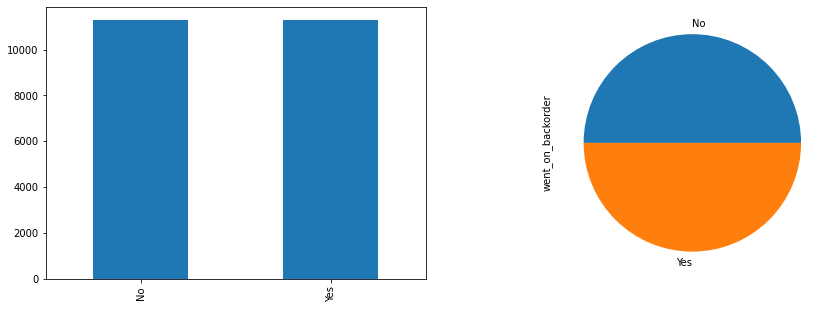

In [ ]:
#Visualize our balance dataset
"""Okay we have successfully balanced our
dataset now. Lets try to visualize our dataset
and see our results."""
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
balanced_test_dt["went_on_backorder"].value_counts().plot(kind="bar")
plt.subplot(1, 2, 2)
balanced_test_dt["went_on_backorder"].value_counts().plot(kind="pie")
plt.show()

## Drop features
We are going to drop all the features we droped in our train dataset. Lets get started.

In [ ]:
#Split dataset into x_test and y_test
x_test = balanced_test_dt.drop("went_on_backorder", axis=1)
y_test = balanced_test_dt["went_on_backorder"]

In [ ]:
#Drop highly correlated features with liad time
x_test_ = x_test.drop([
 'forecast_6_month','forecast_9_month','perf_12_month_avg',"sku",
 'sales_3_month','sales_6_month','sales_9_month',"lead_time"           
], axis=1)

In [ ]:
#Display to check results
x_test_.head()

,national_inv,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
134190,2.0,0.0,0.0,0.0,0.0,No,0.0,0.46,0.0,No,No,No,Yes,No
630622,11.0,0.0,18.0,6.0,13.0,No,0.0,0.87,0.0,No,No,Yes,Yes,No
599795,15.0,0.0,0.0,0.0,1.0,No,0.0,0.99,0.0,No,No,No,Yes,No
981765,50562.0,0.0,0.0,25.0,0.0,No,0.0,0.92,0.0,No,No,Yes,Yes,No
1262355,2.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.0,No,No,No,Yes,No


## Preprocessing test dataset
Okay so we are going to transform on our test dataset. **Note** When we were balancing our dataset, the selected values did not contain any Nan values. Hence we have to drop the null values in our test dataset before we can transform on our test dataset. Okay so lets get started now.

In [ ]:
#Drop rows with null values
xtest_ = x_test_.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)

#Display results
xtest_.head()

,national_inv,in_transit_qty,forecast_3_month,sales_1_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
134190,2.0,0.0,0.0,0.0,0.0,No,0.0,0.46,0.0,No,No,No,Yes,No
630622,11.0,0.0,18.0,6.0,13.0,No,0.0,0.87,0.0,No,No,Yes,Yes,No
599795,15.0,0.0,0.0,0.0,1.0,No,0.0,0.99,0.0,No,No,No,Yes,No
981765,50562.0,0.0,0.0,25.0,0.0,No,0.0,0.92,0.0,No,No,Yes,Yes,No
1262355,2.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.0,No,No,No,Yes,No


In [ ]:
#Transoform on x_test
xtest_ = cat_.transform(x_test_)

#Display results
xtest_

array([[1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.94600000e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.98700000e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.99900000e-01, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.94400000e-01, 1.94594595e-02],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 9.99800000e-01, 6.17760618e-04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.98600000e-01, 1.54440154e-04]])

In [ ]:
#Display onehotencoded columns(categorical features)
cat_.transformers_[0][1].named_steps["step1"].get_feature_names()

array(['x0_No', 'x0_Yes', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No',
       'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes'], dtype=object)

In [ ]:
#Create a dataframe out of our results
xxtest_ = pd.DataFrame(xtest_, columns=['x0_No', 'x0_Yes', 'x1_No', 'x1_Yes', 'x2_No', 'x2_Yes', 'x3_No',
                                'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_Yes','national_inv', 'in_transit_qty', 
                               'forecast_3_month', 'sales_1_month','min_bank', 'pieces_past_due', 'perf_6_month_avg', 
                               'local_bo_qty'])

#Display results
xxtest_.head()

,x0_No,x0_Yes,x1_No,x1_Yes,x2_No,x2_Yes,x3_No,x3_Yes,x4_No,x4_Yes,x5_No,x5_Yes,national_inv,in_transit_qty,forecast_3_month,sales_1_month,min_bank,pieces_past_due,perf_6_month_avg,local_bo_qty
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006277,0.0,0.000000,0.000000,0.000000,0.0,0.9946,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.006284,0.0,0.000067,0.000105,0.000272,0.0,0.9987,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006287,0.0,0.000000,0.000000,0.000021,0.0,0.9999,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.044831,0.0,0.000000,0.000436,0.000000,0.0,0.9992,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.006277,0.0,0.000000,0.000000,0.000000,0.0,0.9992,0.0


Great we have successfully preproccessed our test dataset. Now, we are going to select the most import columns using the train_dataset columns. Okay so now, lets get started.

In [ ]:
#Get best 6 features from our test dataset using train_data
test_data = xxtest_[train_data.columns]

#Display results
test_data.head()

,x1_Yes,x3_Yes,x0_Yes,local_bo_qty,perf_6_month_avg,x5_Yes
0,0.0,0.0,0.0,0.0,0.9946,0.0
1,0.0,1.0,0.0,0.0,0.9987,0.0
2,0.0,0.0,0.0,0.0,0.9999,0.0
3,0.0,1.0,0.0,0.0,0.9992,0.0
4,0.0,0.0,0.0,0.0,0.9992,0.0


In [ ]:
#Transform on test dataset
ytest = label.transform(y_test)

#Display results
ytest

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Okay so now lets check their shapes to see if they are both in the same shape
train_data.shape, ytrain.shape, test_data.shape, ytest.shape

((22586, 6), (22586,), (22586, 6), (22586,))

In [ ]:
#Display final train dataset
train_data.head()

,x1_Yes,x3_Yes,x0_Yes,local_bo_qty,perf_6_month_avg,x5_Yes
0,0.0,0.0,0.0,0.0,0.9992,0.0
1,1.0,0.0,0.0,0.0,0.9958,0.0
2,0.0,0.0,0.0,0.0,0.9990,0.0
3,0.0,1.0,0.0,0.0,0.9983,0.0
4,1.0,0.0,0.0,0.0,0.9924,0.0


In [ ]:
#Display final test dataset
test_data.head()

,x1_Yes,x3_Yes,x0_Yes,local_bo_qty,perf_6_month_avg,x5_Yes
0,0.0,0.0,0.0,0.0,0.9946,0.0
1,0.0,1.0,0.0,0.0,0.9987,0.0
2,0.0,0.0,0.0,0.0,0.9999,0.0
3,0.0,1.0,0.0,0.0,0.9992,0.0
4,0.0,0.0,0.0,0.0,0.9992,0.0


# Model Building
Finally, we are done preprocessing our train and test dataset. Now, we are going to start building our model. As said earlier, we are going to build our model by peforming different type of experiment using different type of `Algorithms`. Algorithms to experiment on are as follows:

* Artificial Neural Network
* RandomForestClassifier
* DecisionTree
* NaiveBayes
* LogisticRegression
* K-Nearest Neighbour(KNN)
* Support Vector Machine(SVM)
* GradientBoostingClassifier

Then evaluate our models on the following Evaluation metrics inother to make better decisions:

* Accuracy score
* F1 score
* Precision
* Recall
* Confusion matrics
* Classification report

But before we get started, lets build two functions. The first function will be used to evaluate our model after we successfully build it whiles the second function will be used to build our models. Without wasting much time, lets get started.


In [ ]:
#a function to evaluate our models performances
def evaluate_model(y_pred, y_test):
  """
  This function will be used to evaluate
  our model after it has been successfully
  been built.

  Args:
    y_pred-> the predicted values after
    the model has been successfully been built.

    y_test-> the actual/y_test dataset which
    will be used in conjuction with our predicted
    value to evaluate our model"""

  #Get confusion metrics
  conf_metrics = confusion_matrix(y_test, y_pred)

  #Get classification report
  cls_report = classification_report(y_pred, y_test)

  #Get precision, recall, f1, accuracy_score and corss_val_score
  results = {
      "accuracy": round(accuracy_score(y_test, y_pred), 3),
      "precision": round(precision_score(y_test, y_pred), 3),
      "recall": round(recall_score(y_test, y_pred), 3),
      "f1": round(f1_score(y_test, y_pred), 3)
  }

  #Visualize our confusion metrics
  sns.heatmap(conf_metrics, annot=True, fmt="g")
  plt.show()

  #Display confusion metrics
  print(cls_report)

  #return results
  return results

In [ ]:
#Create a function to build model
def build_model(xtrain, ytrain, xtest, algorithm):
  """
  This function will be used
  to build all our models.
  Args:
    xtrain-> x train dataset to build
    our model.

    ytrain-> y train dataset to build
    our model.

    algorithm-> the algorithm to be used
    to build our model
  """

  #Initialize our model
  clf = algorithm()

  #Fit our model
  clf.fit(xtrain, ytrain)

  #Make prediction
  pred = clf.predict(xtest)

  #Return final results
  return clf, pred


## Logistic Regression(Base model)
Okay so we are going to build our base model using `Logistic Regression` with default parameters. Lets get started.

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build model by calling the 
clf_0, ypred_0 = build_model(
    train_data, ytrain,
    test_data,
    LogisticRegression
)

In [ ]:
#Check predicted values
ypred_0

array([1, 1, 1, ..., 1, 1, 0])

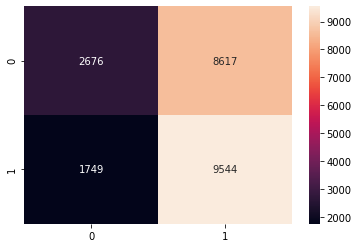

              precision    recall  f1-score   support

           0       0.24      0.60      0.34      4425
           1       0.85      0.53      0.65     18161

    accuracy                           0.54     22586
   macro avg       0.54      0.57      0.49     22586
weighted avg       0.73      0.54      0.59     22586



{'accuracy': 0.541, 'f1': 0.648, 'precision': 0.526, 'recall': 0.845}

In [ ]:
#Lets evaluate our model
eval_0 = evaluate_model(ypred_0, ytest)

#Display results
eval_0

## Support Vector Machine(model_1)
Build model_1 using support vector machine.

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build model by calling the 
clf_1, ypred_1 = build_model(
    train_data, ytrain,
    test_data,
    SVC
)

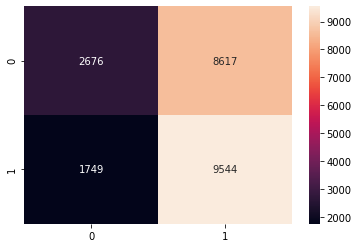

              precision    recall  f1-score   support

           0       0.24      0.60      0.34      4425
           1       0.85      0.53      0.65     18161

    accuracy                           0.54     22586
   macro avg       0.54      0.57      0.49     22586
weighted avg       0.73      0.54      0.59     22586



{'accuracy': 0.541, 'f1': 0.648, 'precision': 0.526, 'recall': 0.845}

In [ ]:
#Evaluate our model
eval_1 = evaluate_model(ypred_1, ytest)

#isplay results
eval_1

## K-Nearest Neighbour(model_2)
Okay soo we are going to build our 3rd model. With this model, we are going to use KNN. From the previous models, we could see that our models are having similer results. Lets see if with this model, we will get a different results. Lets get started now.

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build model
clf_2, ypred_2 = build_model(
     train_data, ytrain,
     test_data, KNeighborsClassifier
)

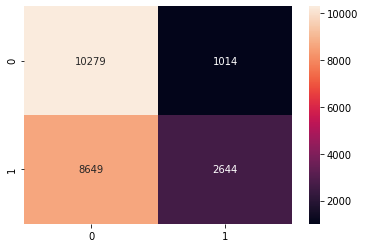

              precision    recall  f1-score   support

           0       0.91      0.54      0.68     18928
           1       0.23      0.72      0.35      3658

    accuracy                           0.57     22586
   macro avg       0.57      0.63      0.52     22586
weighted avg       0.80      0.57      0.63     22586



{'accuracy': 0.572, 'f1': 0.354, 'precision': 0.723, 'recall': 0.234}

In [ ]:
#Evaluate model
eval_2 = evaluate_model(ypred_2, ytest)

#Display results
eval_2

## GaussianNB(model_3)

In [ ]:
#Bset random seed
tf.random.set_seed(42)

#Build model
clf_3, ypred_3 = build_model(train_data, ytrain,
                          test_data, GaussianNB)

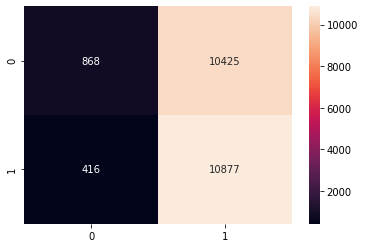

              precision    recall  f1-score   support

           0       0.08      0.68      0.14      1284
           1       0.96      0.51      0.67     21302

    accuracy                           0.52     22586
   macro avg       0.52      0.59      0.40     22586
weighted avg       0.91      0.52      0.64     22586



{'accuracy': 0.52, 'f1': 0.667, 'precision': 0.511, 'recall': 0.963}

In [ ]:
#Evaluate model
eval_3 = evaluate_model(ypred_3, ytest)

#Display results
eval_3

## RandomForestClassifier(model_4)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build model
clf_4, ypred_4 = build_model(train_data, ytrain,
                    test_data, RandomForestClassifier)

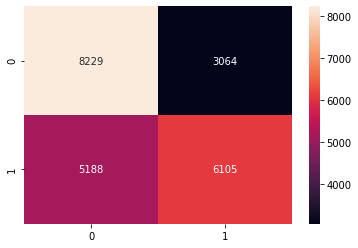

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     13417
           1       0.54      0.67      0.60      9169

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541}

In [ ]:
#Evaluate odel
eval_4 = evaluate_model(ypred_4, ytest)

#Display results
eval_4

## DecisionTreeClassifier(model_5)

In [ ]:
#set random seed
tf.random.set_seed(42)

#Build model
clf_5, ypred_5 = build_model(train_data, ytrain,
                             test_data, DecisionTreeClassifier)

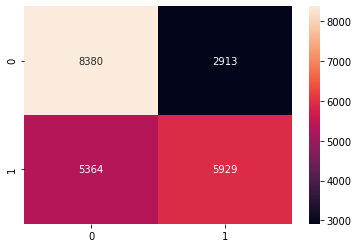

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     13744
           1       0.53      0.67      0.59      8842

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.66      0.63      0.64     22586



{'accuracy': 0.634, 'f1': 0.589, 'precision': 0.671, 'recall': 0.525}

In [ ]:
#Evaluate model
eval_5 = evaluate_model(
    ypred_5, ytest
)

#Display results
eval_5

## GradientBoostingClassifier(model_6)

In [ ]:
#set random seed
tf.random.set_seed(42)

#Build model
clf_6, ypred_6 = build_model(train_data, ytrain, test_data,
                              GradientBoostingClassifier)

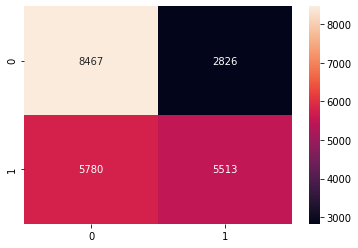

              precision    recall  f1-score   support

           0       0.75      0.59      0.66     14247
           1       0.49      0.66      0.56      8339

    accuracy                           0.62     22586
   macro avg       0.62      0.63      0.61     22586
weighted avg       0.65      0.62      0.63     22586



{'accuracy': 0.619, 'f1': 0.562, 'precision': 0.661, 'recall': 0.488}

In [ ]:
#Evaluate our model
eval_6 = evaluate_model(ypred_6, ytest)

#Display results
eval_6

In [ ]:
"""Okay so lest create a dataframe out from
our resulted evaluation metrics by sorting
them based on the highest accuracy score."""

#Create a DataFrame from our evvaluation
baseline_model = pd.DataFrame({
    "Baseline": eval_0,"model_1": eval_1,"model_2": eval_2,
    "model_3": eval_3,"model_4": eval_4,"model_5": eval_5,
    "model_6": eval_5
}).T.sort_values(by="accuracy", ascending=False)

#Display results
baseline_model

,accuracy,precision,recall,f1
model_4,0.635,0.666,0.541,0.597
model_5,0.634,0.671,0.525,0.589
model_6,0.634,0.671,0.525,0.589
model_2,0.572,0.723,0.234,0.354
Baseline,0.541,0.526,0.845,0.648
model_1,0.541,0.526,0.845,0.648
model_3,0.520,0.511,0.963,0.667


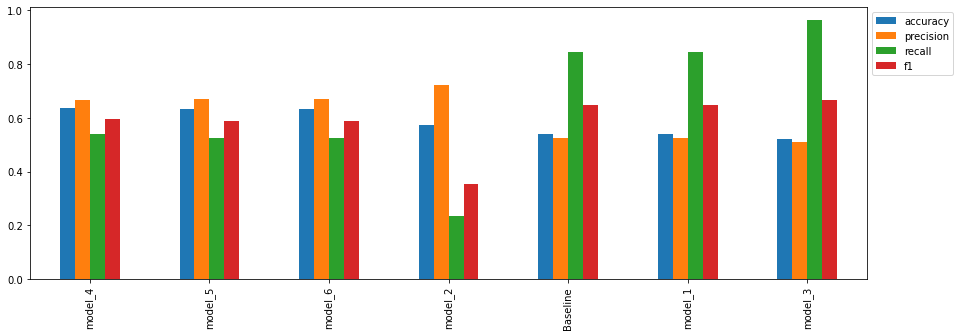

In [ ]:
#Lets visualize our baseline model
baseline_model.plot(kind="bar", 
figsize=(15, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

**Sammarize**

Okay so we have successfully build our base models. From the models we've built so far, we can see that our models were performing a little well on the following algorithms considuring the accuracy, precision, recall and f1 score:

* DecisionTreeClassifier
* RandomForestClassier
* GradientBoostingClassier

Out of all the Algorithms we experimented on, it was only this three models that was giving us a good accuracy score even though it has not yet beat our `Evaluation` we defined. Now, we are going to start to perform hyper-parameter tunning on this three(3) Algorihms. We will be using:

* RandomizedSearchCV
* GridSearchCV

We will apply this techniques on this algorithms and select the on with a good accuracy, precision and recall score. Without wasting much time, lets get started.

# Hyperparameter Tunning
Okay so as said earlier on, we are going to perform hyper-parameter tunning on the algorithms that gave us a good accuracy, precision, recall and f1 score. We are going to go in the following other.

* We will perform Randomized Searched CV first
* Then we wil perform `GridSearchCV` on each of the algorithms as we already know that `Machine Learning` is al about performing different experiment until you meet your evaluation metrics. Okay so without wasting much time, lets get started.

Before we get started, lets build two functions to help us achieve our hyperparameter tunung. The first function will help us perform hyperparameter tunning using `RandomizedSearchCV` and the second one will be used using `GridSearchCV`. Lets get started.

In [ ]:
#Create a function for RandomizedSearchCV
def randomized_cv(clf, grid, xtrain, ytrain):
  """
  This function will be used to perform
  RandomizedSearchCV and return the best
  parameters to train our models on.
  Args:

    clf-> the returned value after we
    initialized our algorithms in our
    build model function. eg: with
    RandomForestClassifier = clf_4,
    DecisionTreeClassifier = clf_5,
    GradientBoostingClassifier = clf_6.

    grid -> the key value pair of our
    algorithms parameter to help select
    the best parameters.

    xtrain, ytrain -> the training dataset
    of both x and y.
    
    Note: clf = variable assigned when initializing 
    our algorithms in our build model function
    """

  #Initialize randomized search cv
  rs_cv = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,
    random_state=42,
    cv=5, verbose=0,
    n_jobs=-1
  )

  #Fit to get the best hyper parameter
  rs_cv.fit(xtrain, ytrain)

  #Get best hyperparameters
  best_params = rs_cv.best_params_

  #return results
  return rs_cv, best_params

In [ ]:
#Create a function for grid search cv
def grid_search(clf, grid, xtrain, ytrain):
  """
  This function will be used to perform
  RandomizedSearchCV and return the best
  parameters to train our models on.
  Args:

    clf-> the returned value after we
    initialized our algorithms in our
    build model function. eg: with
    RandomForestClassifier = clf_4,
    DecisionTreeClassifier = clf_5,
    GradientBoostingClassifier = clf_6.

    grid -> the key value pair of our
    algorithms parameter to help select
    the best parameters.

    xtrain, ytrain -> the training dataset
    of both x and y."""

  #Initialize GridSearchCV
  gs_cv = GridSearchCV(
   estimator=clf, cv=5, verbose=0,
   param_grid=grid,
  )

  #Fit on GridSearchCV
  gs_cv.fit(xtrain, ytrain)

  #Get best parameters
  best_param = gs_cv.best_params_

  #Return results
  return gs_cv, best_param

In [ ]:
"""
Okay so we are going to define the grid parameters for RandomForestClassifier,
DecisionTreeClassifier and GradientBoostingClassifier for RandomizedSearchCV.
"""

# RandomForestClassifier and GradientBoostingClassifier
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
rfc_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 8],
    'bootstrap': [True, False]
}

#DecisionTreeClassifier
dtc_grid = {
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#GradientBoostingClassifier
gbost_grid = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## RandomForestClassifier

### model_7 RandomSearchCV
We are going to start to perform our hyper-parameter tunning on RandomForestClassifier using `RandomizedSearchCV`. Let's get started.

In [ ]:
#set random seed
tf.random.set_seed(42)

#Call function to perform RandomizedSearchCV
rs_4, param_4 = randomized_cv(
    clf_4, rfc_grid, 
    train_data, ytrain
)

#Display best parameters
param_4

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1400}

In [ ]:
"""
Okay so after performing our hyperparameter using
RandomizedSearchCV on our train dataset, we could see
the parameters it returned. Okay so now lets make prediction
using our test dataset and rs_4"""
#Make prediction
ypred_7 = rs_4.predict(test_data)

#Display results
ypred_7

array([1, 1, 0, ..., 1, 1, 1])

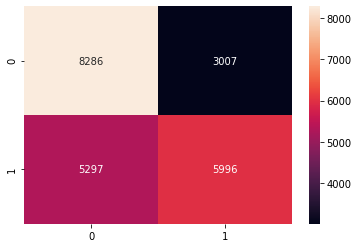

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     13583
           1       0.53      0.67      0.59      9003

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.632, 'f1': 0.591, 'precision': 0.666, 'recall': 0.531}

In [ ]:
#Evalue our results
eval_4rs = evaluate_model(ypred_7, ytest)

#Display results
eval_4rs

In [ ]:
#Display previouse results to ccompare
eval_4

{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541}

### model_8 GridSearchCV


In [ ]:
"""
It seems like nothing changed. Our aaccuracy
score using default parameters and after performing
our hyper-parameter tuning using grid serach cv, we're
still getting the same results. Okay now lets try it
again using GridSearchCV"""
#set random seed
tf.random.set_seed(42)

#Define GridSearchCVGrid
rfc_grid_gs = {'bootstrap': [False, True],
 'max_depth': [60, 2],
 'max_features': ['sqrt'],
 'min_samples_leaf': [20],
 'min_samples_split': [17],
 'n_estimators': [100, 400]
}

#Call grid search cv to perform hyperparameter tunning
clf_4gs, param_4gs = grid_search(
    clf_4, rfc_grid_gs,
    train_data, ytrain
)

In [ ]:
#Display bestparameters
param_4gs

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 17,
 'n_estimators': 400}

In [ ]:
#Make prediction
ypred_8 = clf_4gs.predict(test_data)

#Display results
ypred_8

array([1, 1, 0, ..., 1, 1, 1])

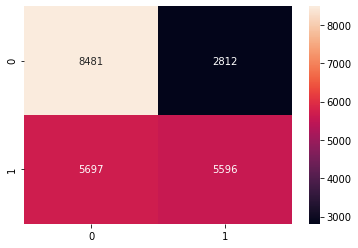

              precision    recall  f1-score   support

           0       0.75      0.60      0.67     14178
           1       0.50      0.67      0.57      8408

    accuracy                           0.62     22586
   macro avg       0.62      0.63      0.62     22586
weighted avg       0.66      0.62      0.63     22586



{'accuracy': 0.623, 'f1': 0.568, 'precision': 0.666, 'recall': 0.496}

In [ ]:
#Evaluate our model
eval_4gs = evaluate_model(ypred_8, ytest)

#Display results
eval_4gs

In [ ]:
#Create Dataframe out of RandomForestClassifier evaluation
rfc = pd.DataFrame({
    "Default Parameters": eval_4,
    "RandomSearchCV": eval_4rs,
    "GridSearchCV": eval_4gs
}).T.sort_values(by="accuracy", ascending=False)

#Display results
rfc

,accuracy,precision,recall,f1
Default Parameters,0.635,0.666,0.541,0.597
RandomSearchCV,0.632,0.666,0.531,0.591
GridSearchCV,0.623,0.666,0.496,0.568


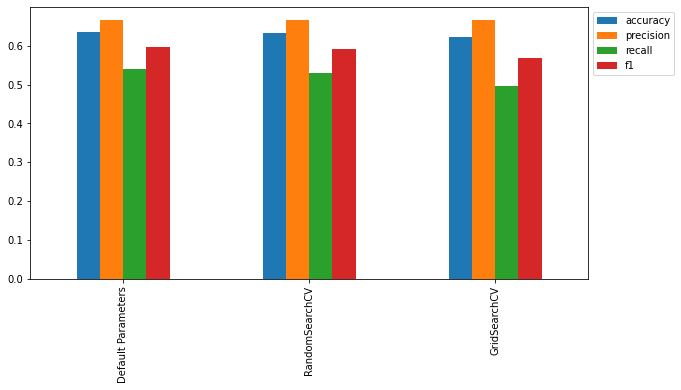

In [ ]:
#Visualize results
rfc.plot(kind="bar", figsize=(10, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

After perfoming our parameter tunning, we can see that our the model with default parameters is perfoming well than the once after we performed hypaparameter tunning. We can still go back change some parameters untill we get a good accuracy score. Butwe will continue by performing hyper parameter tuning on `DecisionTreeClassfier` hopefully, we will get a better results than what is above us. Okay so without wasting much time, lets get started now.

## DecisionTreeClassifier

### model_9 RandomSearchCV

In [ ]:
#set random seed
tf.random.set_seed(42)

#Call function to perform RandomizedSearchCV
rs_5, param_5 = randomized_cv(
    clf_5, dtc_grid, 
    train_data, ytrain
)

#Display best parameters
param_5

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [ ]:
"""
Okay so after performing our hyperparameter using
RandomizedSearchCV on our train dataset, we could see
the parameters it returned. Okay so now lets make prediction
using our test dataset and rs_5"""
#Make prediction
ypred_9 = rs_5.predict(test_data)

#Display results
ypred_9

array([1, 1, 0, ..., 1, 1, 1])

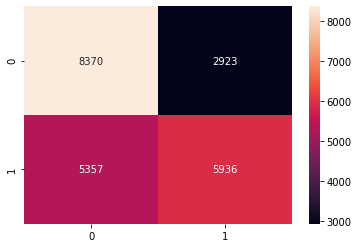

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     13727
           1       0.53      0.67      0.59      8859

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.66      0.63      0.64     22586



{'accuracy': 0.633, 'f1': 0.589, 'precision': 0.67, 'recall': 0.526}

In [ ]:
#Evalue our results
eval_5rs = evaluate_model(ypred_9, ytest)

#Display results
eval_5rs

### model_10 GridSearchCV

In [ ]:
"""
It seems like nothing changed. Our aaccuracy
score using default parameters and after performing
our hyper-parameter tuning using grid serach cv, we're
getting similer results. Okay now lets try it
again using GridSearchCV"""
#set random seed
tf.random.set_seed(42)

#Define GridSearchCVGrid
dtc_grid_gs = {
 'max_depth': [110, 200, 250],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 4, 5],
 'min_samples_split': [10, 30, 100]
}

#Call grid search cv to perform hyperparameter tunning
clf_5gs, param_5gs = grid_search(
    clf_5, dtc_grid_gs,
    train_data, ytrain
)

#Display best parameter
param_5gs

{'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 30}

In [ ]:
"""
Okay so after performing our hyperparameter using
RandomizedSearchCV on our train dataset, we could see
the parameters it returned. Okay so now lets make prediction
using our test dataset and rs_5"""
#Make prediction
ypred_10 = clf_5gs.predict(test_data)

#Display results
ypred_10

array([1, 1, 0, ..., 1, 0, 1])

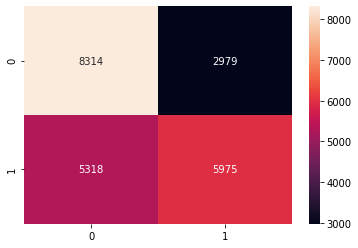

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     13632
           1       0.53      0.67      0.59      8954

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.633, 'f1': 0.59, 'precision': 0.667, 'recall': 0.529}

In [ ]:
#Evaluate our model
eval_5gs = evaluate_model(ypred_10, ytest)

#Display results
eval_5gs

In [ ]:
#Create Dataframe out of DecisionTree evaluation
dtc = pd.DataFrame({
    "Default Parameters": eval_5,
    "RandomSearchCV": eval_5rs,
    "GridSearchCV": eval_5gs
}).T.sort_values(by="accuracy", ascending=False)

#Display results
dtc

,accuracy,precision,recall,f1
Default Parameters,0.634,0.671,0.525,0.589
RandomSearchCV,0.633,0.670,0.526,0.589
GridSearchCV,0.633,0.667,0.529,0.590


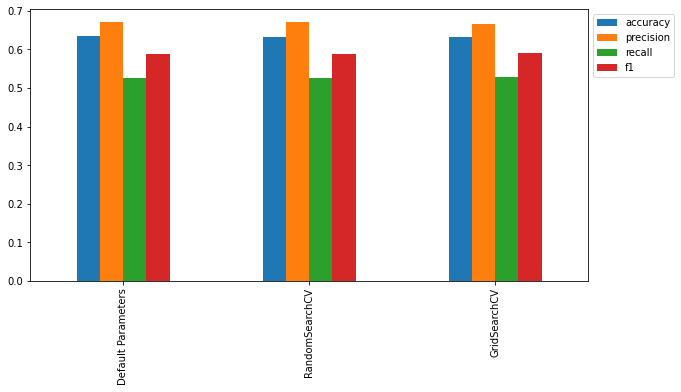

In [ ]:
#Visualize results
dtc.plot(kind="bar", figsize=(10, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

Just with RandomForestClassifier, our models results are very similer. There is no improvement in our model(it has not yet hit our evaluation i.e between 0.70 and 95). Lets continue to performing our hypaparameter tunning on `GradientBoostingVlassifier` hopefully, we will get a better results than what we are getting soo far. Lets get started.

## GradientBoostingClassifier

### model_11 RandomSearchCV

In [ ]:
#set random seed
tf.random.set_seed(42)

#Call function to perform RandomizedSearchCV
rs_6, param_6 = randomized_cv(
    clf_6, gbost_grid, 
    train_data, ytrain
)

#Display best parameters
param_6

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
"""
Okay so after performing our hyperparameter using
RandomizedSearchCV on our train dataset, we could see
the parameters it returned. Okay so now lets make prediction
using our test dataset and rs_6"""
#Make prediction
ypred_11 = rs_6.predict(test_data)

#Display results
ypred_11

array([1, 1, 0, ..., 1, 1, 1])

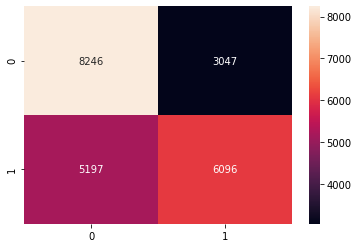

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     13443
           1       0.54      0.67      0.60      9143

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.667, 'recall': 0.54}

In [ ]:
#Evalue our results
eval_6rs = evaluate_model(ypred_11, ytest)

#Display results
eval_6rs

### model_12 GridSearchCV

In [ ]:
"""
It seems like nothing changed. Our aaccuracy
score using default parameters and after performing
our hyper-parameter tuning using grid serach cv, we're
getting similer results. Okay now lets try it
again using GridSearchCV"""
#set random seed
tf.random.set_seed(42)

#Define GridSearchCVGrid
gbc_grid_gs = {
 'max_depth': [80,100],
 'max_features': ['auto'],
 'min_samples_leaf': [2,10],
 'min_samples_split': [2,20],
 'n_estimators': [50,100,200]
}


#Call grid search cv to perform hyperparameter tunning
clf_6gs, param_6gs = grid_search(
    clf_6, gbc_grid_gs,
    train_data, ytrain
)

#Display best parameter
param_6gs

{'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
"""
Okay so after performing our hyperparameter using
RandomizedSearchCV on our train dataset, we could see
the parameters it returned. Okay so now lets make prediction
using our test dataset and rs_6"""
#Make prediction
ypred_12 = clf_6gs.predict(test_data)

#Display results
ypred_12

array([1, 1, 0, ..., 1, 1, 1])

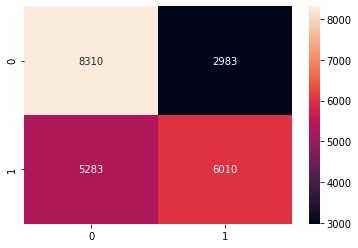

              precision    recall  f1-score   support

           0       0.74      0.61      0.67     13593
           1       0.53      0.67      0.59      8993

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.634, 'f1': 0.593, 'precision': 0.668, 'recall': 0.532}

In [ ]:
#Evaluate our model
eval_6gs = evaluate_model(ypred_12, ytest)

#Display results
eval_6gs

In [ ]:
#Create Dataframe out of GradientBoostClassifier evaluation
gbc = pd.DataFrame({
    "Default Parameters": eval_6,
    "RandomSearchCV": eval_6rs,
    "GridSearchCV": eval_6gs
}).T.sort_values(by="accuracy", ascending=False)

#Display results
gbc

,accuracy,precision,recall,f1
RandomSearchCV,0.635,0.667,0.540,0.597
GridSearchCV,0.634,0.668,0.532,0.593
Default Parameters,0.619,0.661,0.488,0.562


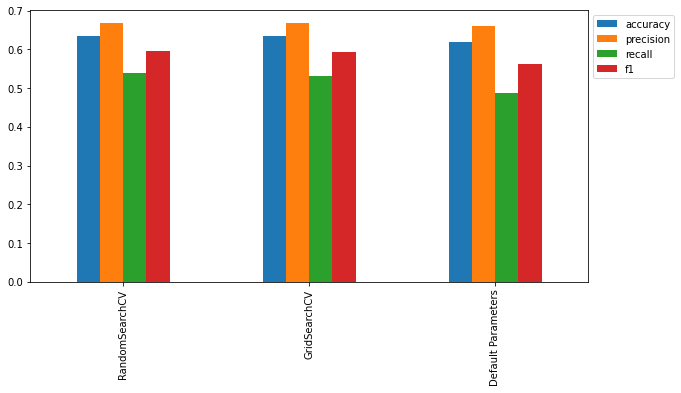

In [ ]:
#Visualize results
gbc.plot(kind="bar", figsize=(10, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
"""
Now that we have performed hyperparameter tunning using
both grid serach and random search cv, we are going to
create a dataframe from our by grouping all model built
using GridSearchCV and all models built using RandomSearchCV"""

#Grid Search CV
grid_search_cv = pd.DataFrame({
    "model_7": eval_4gs, #Grid search cv model
    "model_8": eval_5gs, #Grid search cv model
    "model_9": eval_6gs #Grid search cv model
}).T.sort_values(by="accuracy", ascending=False)

#Random Search CV
random_search_cv = pd.DataFrame({
    "model_10": eval_4rs, #Random search cv model
    "model_11": eval_5rs, #Random search cv model
    "model_12": eval_6rs #Random search cv model
}).T.sort_values(by="accuracy", ascending=False)

In [ ]:
#Display grid search
grid_search_cv

,accuracy,precision,recall,f1
model_9,0.634,0.668,0.532,0.593
model_8,0.633,0.667,0.529,0.590
model_7,0.623,0.666,0.496,0.568


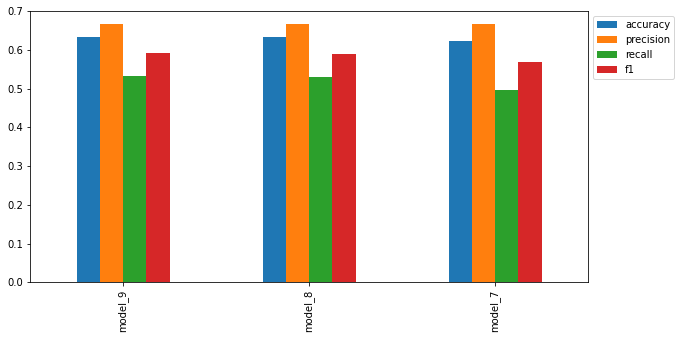

In [ ]:
#Visualize grid search cv
grid_search_cv.plot(kind="bar", figsize=(10, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
#Display random  search
random_search_cv

,accuracy,precision,recall,f1
model_12,0.635,0.667,0.540,0.597
model_11,0.633,0.670,0.526,0.589
model_10,0.632,0.666,0.531,0.591


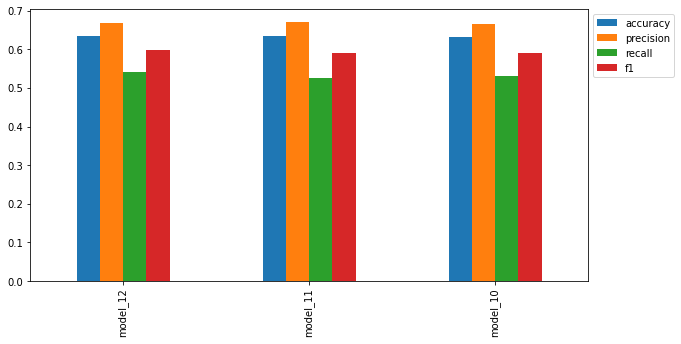

In [ ]:
#Visualize random search cv
random_search_cv.plot(kind="bar", figsize=(10, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

It's now time to compare our models. That's the three models created using `Default parameters`, `GridSearchCV` and `RandomSearchCV`. We will first create a dart af r ame out of this models then visualize it to make better decision. Lets get started.

In [ ]:
#Combine models
model_ = pd.DataFrame({
    "model_4": eval_4,
    "model_5": eval_5,
    "model_6": eval_6,
    "model_7": eval_4rs,
    "model_8": eval_4gs,
    "model_9": eval_5rs,
    "model_10": eval_5gs,
    "model_11": eval_6rs,
    "model_12": eval_6gs
}).T.sort_values(by="accuracy", ascending=False)

#Display model
model_

,accuracy,precision,recall,f1
model_4,0.635,0.666,0.541,0.597
model_11,0.635,0.667,0.540,0.597
model_5,0.634,0.671,0.525,0.589
model_12,0.634,0.668,0.532,0.593
model_9,0.633,0.670,0.526,0.589
model_10,0.633,0.667,0.529,0.590
model_7,0.632,0.666,0.531,0.591
model_8,0.623,0.666,0.496,0.568
model_6,0.619,0.661,0.488,0.562


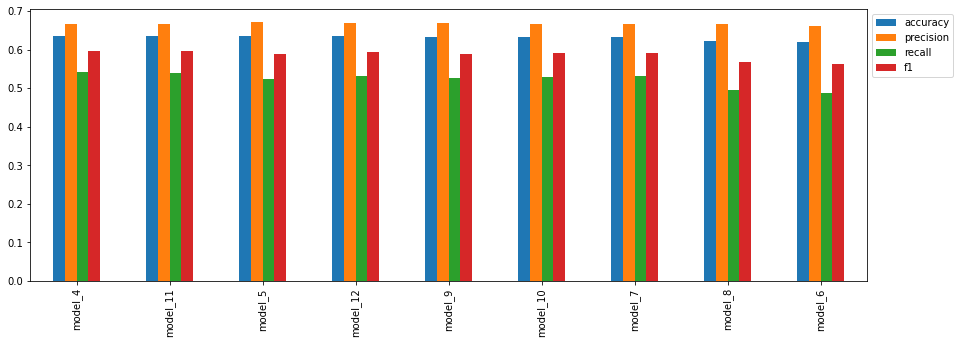

In [ ]:
#Visualize model
model_.plot(kind="bar", figsize=(15, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
#Display model 4 and 7 evaluation results
eval_4, eval_4rs

({'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541},
 {'accuracy': 0.632, 'f1': 0.591, 'precision': 0.666, 'recall': 0.531})

Even though we didn't get a better results, the model performing well are model_4 and model_7. We still havent hit our `evaluation` we defined. Because of that, we are going to continue experimenting on our model using `Deep Learning` techniques. We will use googles tensorflow toolkit to continue with our experiments. Okay so lets get started.

# Tensorflow
As said earlier on, we are going to continue to experiment using tensorflow. Without wasting much time, lets continue with our experiment by building or 13th model. We will be experimenting using keras `Functional API` and `Sequential API`.

## model_13
Okay so we are going to build our model with basic parameters to set as a baseline for all our tesnorflow models. Lets get started.

In [ ]:
#set random seed
tf.random.set_seed(42)

#Define input shape
inputs = tf.keras.layers.Input(shape=(train_data.shape[1],), dtype=tf.float64)

#Define 1st dense layer
x = tf.keras.layers.Dense(units=64)(inputs)
x = tf.keras.layers.Dense(units=48)(x)
x = tf.keras.layers.Dense(units=24)(x)
x = tf.keras.layers.Dense(units=16)(x)

#Define output layer
outputs = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

#Define model
model_13 = tf.keras.Model(inputs, outputs)

In [ ]:
#Check model layers
model_13.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                3120      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                400       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,161
Trainable params: 5,161
Non-trainable params: 0
___________________________________________________________

In [ ]:
#Compile our model
model_13.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [ ]:
#Fit on train datasets
history_13 = model_13.fit(
    train_data, ytrain,
    validation_data=(test_data, ytest),
    epochs=5
)

Epoch 1/5
706/706 [==============================] - 4s 4ms/step - loss: 0.6894 - accuracy: 0.5266 - val_loss: 0.6859 - val_accuracy: 0.5406
Epoch 2/5
706/706 [==============================] - 3s 4ms/step - loss: 0.6868 - accuracy: 0.5295 - val_loss: 0.6848 - val_accuracy: 0.5409
Epoch 3/5
706/706 [==============================] - 3s 5ms/step - loss: 0.6860 - accuracy: 0.5352 - val_loss: 0.6860 - val_accuracy: 0.5414
Epoch 4/5
706/706 [==============================] - 3s 4ms/step - loss: 0.6856 - accuracy: 0.5327 - val_loss: 0.6838 - val_accuracy: 0.5325
Epoch 5/5
706/706 [==============================] - 3s 4ms/step - loss: 0.6855 - accuracy: 0.5296 - val_loss: 0.6855 - val_accuracy: 0.5296


In [ ]:
#Make prediction
yprob_13 = model_13.predict(test_data)

#Display results
yprob_13

array([[0.47156715],
       [0.5165425 ],
       [0.4721168 ],
       ...,
       [0.54601073],
       [0.4746439 ],
       [0.40394503]], dtype=float32)

In [ ]:
#Get predicted values in once and zero
ypred_13 = tf.squeeze(tf.round(yprob_13))

#Display results
ypred_13

<tf.Tensor: shape=(22586,), dtype=float32, numpy=array([0., 1., 0., ..., 1., 0., 0.], dtype=float32)>

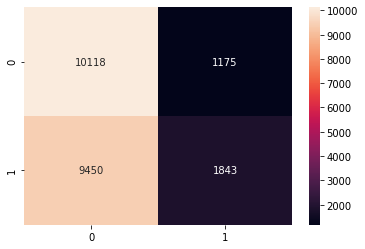

              precision    recall  f1-score   support

         0.0       0.90      0.52      0.66     19568
         1.0       0.16      0.61      0.26      3018

    accuracy                           0.53     22586
   macro avg       0.53      0.56      0.46     22586
weighted avg       0.80      0.53      0.60     22586



{'accuracy': 0.53, 'f1': 0.258, 'precision': 0.611, 'recall': 0.163}

In [ ]:
#Evaluate our model
eval_13 = evaluate_model(ypred_13, ytest)

#Display results
eval_13

## model_14
We are going to build our 4th model. With this model, we are going add regularizer layer to our dense layers. Lets get started now.

In [ ]:
#set random seed
tf.random.set_seed(42)

#Define input layer
inputs = tf.keras.layers.Input(shape=(train_data.shape[1],), dtype=tf.float64)

#Define dense layers
x = tf.keras.layers.Dense(
    units=100,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)
)(inputs)

x = tf.keras.layers.Dense(
    units=80,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)
)(x)

x = tf.keras.layers.Dense(
    units=30,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(l2=0.01)
)(x)

#Add Dropout layer
tf.keras.layers.Dropout(rate=0.02)(x)

#Define output layer
outputs = tf.keras.layers.Dense(units=1, activation="sigmoid")(x)

#Define model
model_14 = tf.keras.Model(inputs, outputs)

In [ ]:
#Check model layers
model_14.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 6)]               0         
_________________________________________________________________
dense_54 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_55 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_56 (Dense)             (None, 30)                2430      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 31        
Total params: 11,241
Trainable params: 11,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compile model
model_14.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [ ]:
#Set random seed
tf.random.set_seed(42)

#Fit on model
history_14 = model_14.fit(
    train_data,
    ytrain,
    validation_data=(test_data, ytest),
    epochs=5
)

Epoch 1/5
706/706 [==============================] - 4s 4ms/step - loss: 1.9426 - accuracy: 0.5095 - val_loss: 1.7734 - val_accuracy: 0.5376
Epoch 2/5
706/706 [==============================] - 3s 4ms/step - loss: 1.6345 - accuracy: 0.5242 - val_loss: 1.5074 - val_accuracy: 0.5398
Epoch 3/5
706/706 [==============================] - 3s 4ms/step - loss: 1.4030 - accuracy: 0.5291 - val_loss: 1.3072 - val_accuracy: 0.5398
Epoch 4/5
706/706 [==============================] - 3s 4ms/step - loss: 1.2285 - accuracy: 0.5266 - val_loss: 1.1563 - val_accuracy: 0.5401
Epoch 5/5
706/706 [==============================] - 3s 4ms/step - loss: 1.0970 - accuracy: 0.5305 - val_loss: 1.0426 - val_accuracy: 0.5154


In [ ]:
#Make prediction
yprob_14 = model_14.predict(test_data)

#Display results
yprob_14

array([[0.49795762],
       [0.4934232 ],
       [0.49798107],
       ...,
       [0.49768066],
       [0.49798095],
       [0.48448166]], dtype=float32)

In [ ]:
#Get predicted values in zeros and once
ypred_14 = tf.squeeze(tf.round(yprob_14))

#Display results
ypred_14

<tf.Tensor: shape=(22586,), dtype=float32, numpy=array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)>

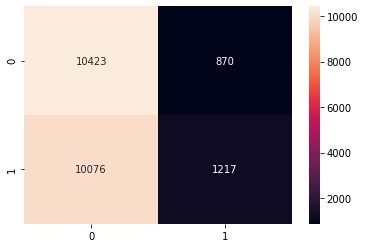

              precision    recall  f1-score   support

         0.0       0.92      0.51      0.66     20499
         1.0       0.11      0.58      0.18      2087

    accuracy                           0.52     22586
   macro avg       0.52      0.55      0.42     22586
weighted avg       0.85      0.52      0.61     22586



{'accuracy': 0.515, 'f1': 0.182, 'precision': 0.583, 'recall': 0.108}

In [ ]:
#Evaluate our model
eval_14 = evaluate_model(ypred_14, ytest)

#Display results
eval_14

So far we've built two models using tensorflow but we are ot getting any good results. We are now going to tune our model using `KerasTunner`. We are going to use a this libry to perform parameter tunning to get the best parameters to get a better working model. Okay so lets get started.

## model_15
Tune model with different parameters using keras tunner to ket the best parameters to build our model on.

In [ ]:
#install keras tunner
!pip3 install -q -U keras_tuner

In [ ]:
#Import keras tuner
import keras_tuner as kt

In [ ]:
#Build model
def build_model_kt(hp):

  #Initialize sequential API
  model = tf.keras.Sequential()

  #Define configurations
  hp_units = hp.Int("units", min_value=32, max_value=512, step=32)
  hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

  #Define dense layers
  model.add(tf.keras.layers.Input(shape=(train_data.shape[1]), dtype=tf.float64))
  model.add(tf.keras.layers.Dense(units = hp_units, activation="relu"))
  model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

  #Compile our model
  model.compile(
      loss="binary_crossentropy",
      optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
      metrics=["accuracy"]
  )

  #Return model
  return model

In [ ]:
#nstantiate tuner and perform hypertuning
tuner = kt.Hyperband(build_model_kt,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     project_name='model_15_a')

#Define early stopping
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
tuner.search(train_data, ytrain, epochs=50, callbacks=[stop_early], validation_data=(test_data, ytest))

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

#Display best parameters
best_hps

Trial 30 Complete [00h 00m 41s]
val_accuracy: 0.5410431027412415

Best val_accuracy So Far: 0.5554768443107605
Total elapsed time: 00h 07m 51s
INFO:tensorflow:Oracle triggered exit


In [ ]:
#Set random seed
tf.random.set_seed(42)

#Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model_15 = tuner.hypermodel.build(best_hps)
history_15 = model_15.fit(train_data, ytrain, epochs=10, validation_data=(test_data, ytest))

val_acc_per_epoch = history_15.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
706/706 [==============================] - 4s 4ms/step - loss: 0.6862 - accuracy: 0.5280 - val_loss: 0.6834 - val_accuracy: 0.5409
Epoch 2/10
706/706 [==============================] - 3s 4ms/step - loss: 0.6841 - accuracy: 0.5326 - val_loss: 0.6814 - val_accuracy: 0.5417
Epoch 3/10
706/706 [==============================] - 3s 4ms/step - loss: 0.6836 - accuracy: 0.5329 - val_loss: 0.6818 - val_accuracy: 0.5409
Epoch 4/10
706/706 [==============================] - 2s 2ms/step - loss: 0.6828 - accuracy: 0.5351 - val_loss: 0.6802 - val_accuracy: 0.5417
Epoch 5/10
706/706 [==============================] - 2s 3ms/step - loss: 0.6825 - accuracy: 0.5341 - val_loss: 0.6819 - val_accuracy: 0.5298
Epoch 6/10
706/706 [==============================] - 3s 4ms/step - loss: 0.6821 - accuracy: 0.5360 - val_loss: 0.6794 - val_accuracy: 0.5420
Epoch 7/10
706/706 [==============================] - 2s 3ms/step - loss: 0.6818 - accuracy: 0.5351 - val_loss: 0.6808 - val_accuracy: 0.5420
Epoch 

In [ ]:
model_15.evaluate(test_data, ytest)

706/706 [==============================] - 1s 2ms/step - loss: 0.6786 - accuracy: 0.5418


[0.678581714630127, 0.5418400764465332]

In [ ]:
#Make prediction
yprob_15 = model_15.predict(test_data)

#Display results
yprob_15

array([[0.52009946],
       [0.6486325 ],
       [0.5201295 ],
       ...,
       [0.7954489 ],
       [0.52985924],
       [0.421367  ]], dtype=float32)

In [ ]:
#Get actual predicted values
ypred_15 = tf.squeeze(tf.round(yprob_15))

#Display results
ypred_15

<tf.Tensor: shape=(22586,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 0.], dtype=float32)>

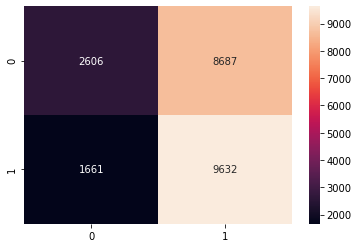

              precision    recall  f1-score   support

         0.0       0.23      0.61      0.33      4267
         1.0       0.85      0.53      0.65     18319

    accuracy                           0.54     22586
   macro avg       0.54      0.57      0.49     22586
weighted avg       0.74      0.54      0.59     22586



{'accuracy': 0.542, 'f1': 0.651, 'precision': 0.526, 'recall': 0.853}

In [ ]:
#Evaluate our model performance
eval_15 = evaluate_model(ypred_15, ytest)

#Display results
eval_15

# Combine All models
We have tried to build different multiple models to get a good accuracy score. We have built 15 different models using different machine learning and deep learning techniques. Now we are going to combine all the models together and select the one with a good accuracy score by comparing them. Lest get started.

In [ ]:
#Combine all models
final_results = pd.DataFrame({
    "model 0": eval_0,
    "model 1": eval_1,
    "model 2": eval_2,
    "model 3": eval_3,
    "model 4": eval_4,
    "model 5": eval_5,
    "model 6": eval_6,
    "model 7": eval_4rs,
    "model 8": eval_4gs,
    "model 9": eval_5rs,
    "model 10": eval_5gs,
    "model 11": eval_6rs,
    "model 12": eval_6gs,
    "model 13": eval_13,
    "model 14": eval_14,
    "model 15": eval_15,
})

In [ ]:
#Display results
final_results

,model 0,model 1,model 2,model 3,model 4,model 5,model 6,model 7,model 8,model 9,model 10,model 11,model 12,model 13,model 14,model 15
accuracy,0.541,0.541,0.572,0.520,0.635,0.634,0.619,0.632,0.623,0.633,0.633,0.635,0.634,0.530,0.515,0.542
precision,0.526,0.526,0.723,0.511,0.666,0.671,0.661,0.666,0.666,0.670,0.667,0.667,0.668,0.611,0.583,0.526
recall,0.845,0.845,0.234,0.963,0.541,0.525,0.488,0.531,0.496,0.526,0.529,0.540,0.532,0.163,0.108,0.853
f1,0.648,0.648,0.354,0.667,0.597,0.589,0.562,0.591,0.568,0.589,0.590,0.597,0.593,0.258,0.182,0.651


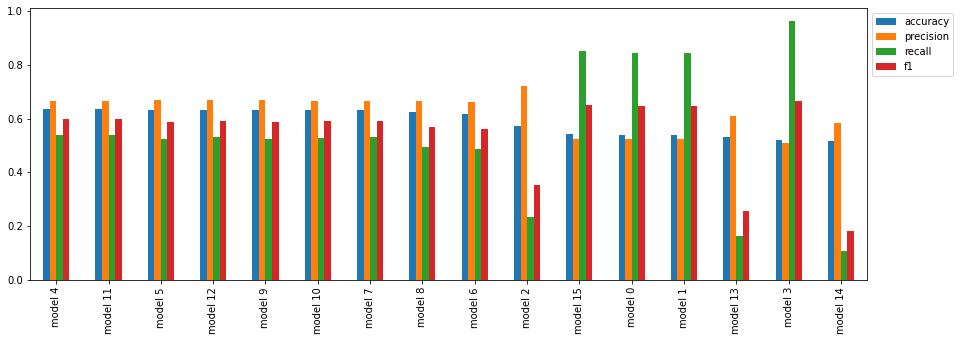

In [ ]:
"""We are going to visualize all our models
by Transposing them and sorting them based on the
model with the highest accuracy score."""

#Lets visualize result
final_results.T.sort_values(by="accuracy", ascending=False).plot(kind="bar", figsize=(15, 5)).legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [ ]:
#Display best model
eval_4

{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541}

# Save model

In [ ]:
"""
Since the model with the highest score
was build using machine learning, we are going
to use pickle to save and download our model. Lets
get started."""
#Save model
pickle.dump(clf_4, open("model_4.pkl","wb"))

In [ ]:
#Import and test model
model_4 = pickle.load(open("model_4.pkl","rb"))

In [ ]:
#Use model to make prediction
save_pred = model_4.predict(test_data)

#Display results
save_pred

array([1, 1, 0, ..., 1, 1, 1])

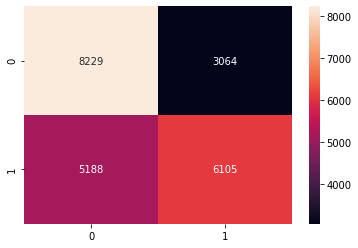

              precision    recall  f1-score   support

           0       0.73      0.61      0.67     13417
           1       0.54      0.67      0.60      9169

    accuracy                           0.63     22586
   macro avg       0.63      0.64      0.63     22586
weighted avg       0.65      0.63      0.64     22586



{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541}

In [ ]:
#Now evaluate model
evaluate_model(save_pred, ytest)

In [ ]:
#Display results
eval_4

{'accuracy': 0.635, 'f1': 0.597, 'precision': 0.666, 'recall': 0.541}

# Conclusion
We have finally come to an end of building our model. So far, we built 16 different models including the base model. We used different `Machine Learning` and `Deep Learning` techniques. Even though we didnt meet our evaluation, we were almost close to our evaluation.

From above, we can see that the model which was performing well was model_4. Why because it had a good accuracy score, precision, recall and f1 score. Now that we have successfully saved the model, we are going to create and expose an API for it then deploy it on a cloud using terraform.

* By: Owusu Bright Debrah
* Email: owusubrightdebrah@gmail.com
* Profession: Data scientist and A Cloud Engineer